In [3]:
import pandas as pd
pd.options.display.max_columns = 1000

import numpy as np

import matplotlib.pyplot as plt

from sklearn import linear_model, preprocessing, model_selection, metrics, pipeline
%matplotlib inline

df = pd.read_csv(r"C:\Users\Z003N71U\Downloads\Training\data_combined_cleaned.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [16]:
df_clean = df.drop(columns=["Id"])  # remove the id column as it does not add an value to the feature

df_clean = df_clean[~df.SalesPrice.isnull()] # no need of empty sales price rows, cos sales price is what we are gonna predict

target = "SalesPrice"
X = df_clean.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
y = df_clean[target]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print("R2_train: %f, \nR2_test: %f\nrmse train: %f\nrmse_test: %f" 
      % (r2_train, r2_test, rmse_train, rmse_test))






R2_train: 0.942081, 
R2_test: 0.196740
rmse train: 19473.835709
rmse_test: 67893.104940


R2_train: 1.000000, 
R2_test: 0.838407
rmse train: 0.000000
rmse_test: 30451.497318


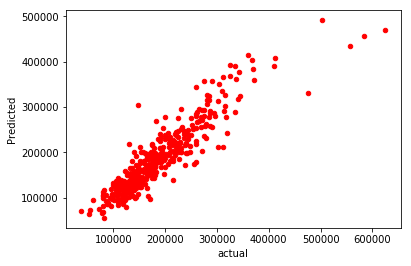

In [4]:
df_clean = df.drop(columns=["Id"])  # remove the id column as it does not add an value to the feature

df_clean = df_clean[~df.SalesPrice.isnull()] # no need of empty sales price rows, cos sales price is what we are gonna predict

target = "SalesPrice"
X = df_clean.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
y = df_clean[target]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LinearRegression())
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print("R2_train: %f, \nR2_test: %f\nrmse train: %f\nrmse_test: %f" 
      % (r2_train, r2_test, rmse_train, rmse_test))

pd.DataFrame({"actual": y_test, "Predicted": y_test_pred}).plot.scatter(0,1, color="red")

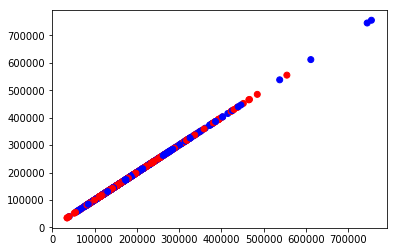

In [10]:
#pd.DataFrame({"actual": y_test, "Predicted": y_test_pred}).plot.scatter(0,1, color="red")
plt.scatter([y_train],[y_train_pred], color= ["red", "blue"])

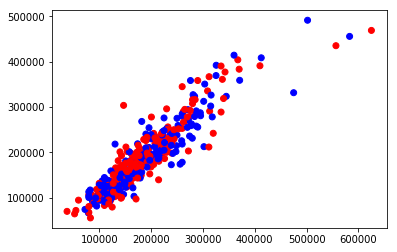

In [11]:
plt.scatter([y_test],[y_test_pred], color= ["red", "blue"])

In [17]:
df_clean = df.drop(columns=["Id"])  # remove the id column as it does not add an value to the feature

df_clean = df_clean[~df.SalesPrice.isnull()] # no need of empty sales price rows, cos sales price is what we are gonna predict

target = "SalesPrice"
X = df_clean.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
y = df_clean[target]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.Ridge(alpha=400.0, max_iter=1000))
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print("R2_train: %f, \nR2_test: %f\nrmse train: %f\nrmse_test: %f" 
      % (r2_train, r2_test, rmse_train, rmse_test))

R2_train: 0.896578, 
R2_test: 0.864171
rmse train: 26022.351097
rmse_test: 27918.633972


In [29]:
pram_grid = {
    "lr__alpha": 100 * np.linspace(10, 12, 20)
}
gs = model_selection.GridSearchCV(est, pram_grid, cv=5, verbose=True)
gs.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print("R2_train: %f, \nR2_test: %f\nrmse train: %f\nrmse_test: %f" 
      % (r2_train, r2_test, rmse_train, rmse_test))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
R2_train: 0.896578, 
R2_test: 0.864171
rmse train: 26022.351097
rmse_test: 27918.633972


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished


In [28]:
gs.best_params_

{'lr__alpha': 1000.0}

In [30]:
10 * np.linspace(10, 12, 20)

array([100.        , 101.05263158, 102.10526316, 103.15789474,
       104.21052632, 105.26315789, 106.31578947, 107.36842105,
       108.42105263, 109.47368421, 110.52631579, 111.57894737,
       112.63157895, 113.68421053, 114.73684211, 115.78947368,
       116.84210526, 117.89473684, 118.94736842, 120.        ])

In [33]:
import pickle

with open("model.pickel", "wb") as f:
    pickle.dump(gs,f)

In [34]:
with open("model.pickel", "rb") as f:
    model_reloaded = pickle.load(f)
    
y_train_pred = model_reloaded.predict(X_train)
y_test_pred = model_reloaded.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print("R2_train: %f, \nR2_test: %f\nrmse train: %f\nrmse_test: %f" 
      % (r2_train, r2_test, rmse_train, rmse_test))


R2_train: 0.860159, 
R2_test: 0.849497
rmse train: 30259.164013
rmse_test: 29387.985154


In [72]:
est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.ElasticNet(alpha=600.0, l1_ratio=1))
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print("R2_train: %f, \nR2_test: %f\nrmse train: %f\nrmse_test: %f" 
      % (r2_train, r2_test, rmse_train, rmse_test))

R2_train: 0.912570, 
R2_test: 0.861076
rmse train: 23925.992834
rmse_test: 28234.910567


In [74]:
from sklearn.ensemble import GradientBoostingClassifier

model= GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print("R2_train: %f, \nR2_test: %f\nrmse train: %f\nrmse_test: %f" 
      % (r2_train, r2_test, rmse_train, rmse_test))

R2_train: -0.643154, 
R2_test: -0.810286
rmse train: 103724.042353
rmse_test: 101922.760214


In [ ]:
print("accuraccy %f" % ((167 + )))